In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Preprocessing**

# **Handling missing values**

# **Median Imputation**

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
input_path = '/content/drive/MyDrive/Colab Notebooks/archive (90)/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
df = pd.read_csv(input_path)

# Replace inf and -inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Median imputation for numerical columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# Save the result
output_path = '/content/drive/MyDrive/Colab Notebooks/archive (90)/median_imputed_file.csv'
df.to_csv(output_path, index=False)

print("✅ Median imputation complete. File saved to:", output_path)
df

✅ Median imputation complete. File saved to: /content/drive/MyDrive/Colab Notebooks/archive (90)/median_imputed_file.csv


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,80,192.168.10.15,61374,6,7/7/2017 5:02,61,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29,80,192.168.10.15,61378,6,7/7/2017 5:02,72,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,80,192.168.10.15,61375,6,7/7/2017 5:02,75,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80,192.168.10.15,61323,6,7/7/2017 5:02,48,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# **Noise Reduction: Savitzky-Golay Filtering**

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

# Load dataset
input_path = '/content/drive/MyDrive/Colab Notebooks/archive (90)/median_imputed_file.csv'
df = pd.read_csv(input_path)

# Apply Savitzky-Golay filter to each numerical column
window_length = 5  # Must be odd and <= length of the data
polyorder = 2      # Polynomial order for the filter

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if len(df[col].dropna()) >= window_length:  # Ensure enough data
        df[col] = savgol_filter(df[col], window_length=window_length, polyorder=polyorder)

# Save the smoothed data
output_path = '/content/drive/MyDrive/Colab Notebooks/archive (90)/sg_filtered_file.csv'
df.to_csv(output_path, index=False)

print("✅ Savitzky-Golay filtering applied and file saved to:", output_path)
df

✅ Savitzky-Golay filtering applied and file saved to: /content/drive/MyDrive/Colab Notebooks/archive (90)/sg_filtered_file.csv


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,380.771429,192.168.10.5,56129.857143,6.0,7/7/2017 3:30,21.628571,1.971429,0.028571,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,183.714286,192.168.10.5,53521.371429,6.0,7/7/2017 3:30,64.485714,1.114286,0.885714,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,142.228571,192.168.10.5,52063.742857,6.0,7/7/2017 3:30,73.771429,0.828571,1.171429,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,349.657143,192.168.10.16,50721.514286,6.0,7/7/2017 3:30,-61.571429,1.257143,0.742857,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,474.114286,192.168.10.5,51886.142857,6.0,7/7/2017 3:30,358.714286,1.742857,0.257143,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,80.000000,192.168.10.15,61376.142857,6.0,7/7/2017 5:02,53.028571,1.000000,1.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29,80.000000,192.168.10.15,61380.400000,6.0,7/7/2017 5:02,75.257143,0.914286,1.085714,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,80.000000,192.168.10.15,61362.485714,6.0,7/7/2017 5:02,66.514286,1.342857,0.657143,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80.000000,192.168.10.15,61343.742857,6.0,7/7/2017 5:02,64.657143,1.371429,0.628571,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


# **Data Augmentation**
# **SMOTE (Synthetic Minority Oversampling Technique)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

# === Step 1: Load your dataset ===
input_path = '/content/drive/MyDrive/Colab Notebooks/archive (90)/sg_filtered_file.csv'
df = pd.read_csv(input_path)

# === Step 2: Split features and target ===
X = df.drop(' Label', axis=1)
y = df[' Label']

print("🔍 Original class distribution:", Counter(y))

# === Step 3: Handle non-numeric columns ===
for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = LabelEncoder().fit_transform(X[col])
        except:
            print(f"⚠️ Dropping column '{col}' - could not encode.")
            X = X.drop(columns=[col])

# === Step 4: Apply SMOTE ===
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("✅ Resampled class distribution:", Counter(y_resampled))

# === Step 5: Combine into a new DataFrame and save ===
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Label'] = y_resampled

output_path = '/content/drive/MyDrive/Colab Notebooks/archive (90)/smote_augmented.csv'
df_resampled.to_csv(output_path, index=False)

print("📁 SMOTE-augmented dataset saved to:", output_path)

df

🔍 Original class distribution: Counter({'DDoS': 128027, 'BENIGN': 97718})
✅ Resampled class distribution: Counter({'BENIGN': 128027, 'DDoS': 128027})
📁 SMOTE-augmented dataset saved to: /content/drive/MyDrive/Colab Notebooks/archive (90)/smote_augmented.csv


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,380.771429,192.168.10.5,56129.857143,6.0,7/7/2017 3:30,21.628571,1.971429,0.028571,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,183.714286,192.168.10.5,53521.371429,6.0,7/7/2017 3:30,64.485714,1.114286,0.885714,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,142.228571,192.168.10.5,52063.742857,6.0,7/7/2017 3:30,73.771429,0.828571,1.171429,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,349.657143,192.168.10.16,50721.514286,6.0,7/7/2017 3:30,-61.571429,1.257143,0.742857,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,474.114286,192.168.10.5,51886.142857,6.0,7/7/2017 3:30,358.714286,1.742857,0.257143,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,80.000000,192.168.10.15,61376.142857,6.0,7/7/2017 5:02,53.028571,1.000000,1.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29,80.000000,192.168.10.15,61380.400000,6.0,7/7/2017 5:02,75.257143,0.914286,1.085714,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,80.000000,192.168.10.15,61362.485714,6.0,7/7/2017 5:02,66.514286,1.342857,0.657143,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80.000000,192.168.10.15,61343.742857,6.0,7/7/2017 5:02,64.657143,1.371429,0.628571,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


# **Feature Extraction**

# **Network Traffic Features**

# **Spatiotemporal Features**

# **Deep Traffic Embedding**

# **Behavioral Features**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# === 1. Load Dataset ===
input_path = '/content/drive/MyDrive/Colab Notebooks/archive (90)/smote_augmented.csv'
df = pd.read_csv(input_path)

# === 2. Clean column names ===
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# === 3. Drop non-numeric or identifier columns ===
id_cols = ['flow_id', 'timestamp', 'label', 'source_ip', 'destination_ip', 'protocol']
df_clean = df.drop(columns=[col for col in id_cols if col in df.columns], errors='ignore')
df_clean = df_clean.select_dtypes(include=[np.number]).fillna(0)

# === 4. Normalize Features ===
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean)

# === 5. Network Traffic Features Extraction ===
network_features = pd.DataFrame()
network_features['mean_packet_length'] = df_clean.filter(like='packet_length').mean(axis=1)
network_features['std_packet_length'] = df_clean.filter(like='packet_length').std(axis=1)
network_features['total_forward_packets'] = df['total_fwd_packets'] if 'total_fwd_packets' in df.columns else 0
network_features['total_backward_packets'] = df['total_backward_packets'] if 'total_backward_packets' in df.columns else 0
network_features['flow_duration'] = df['flow_duration'] if 'flow_duration' in df.columns else 0

# === 6. Spatiotemporal Features ===
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df['hour'] = df['timestamp'].dt.hour
    df['minute'] = df['timestamp'].dt.minute
    df['weekday'] = df['timestamp'].dt.weekday
    spatiotemporal_features = df[['hour', 'minute', 'weekday']].fillna(0)
else:
    spatiotemporal_features = pd.DataFrame(np.zeros((len(df), 3)), columns=['hour', 'minute', 'weekday'])

# === 7. Deep Traffic Embedding via Autoencoder (Functional API) ===
input_dim = scaled_features.shape[1]
encoding_dim = 32

# Functional model
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
embedding = layers.Dense(encoding_dim, activation='relu', name='embedding_layer')(encoded)
decoded = layers.Dense(64, activation='relu')(embedding)
decoded = layers.Dense(128, activation='relu')(decoded)
output_layer = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(scaled_features, scaled_features, epochs=10, batch_size=256, shuffle=True, verbose=0)

# Get embeddings
embedding_model = models.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('embedding_layer').output)
deep_embeddings = embedding_model.predict(scaled_features)

# === 8. Behavioral Features ===
behavioral_features = pd.DataFrame()
behavioral_features['byte_ratio'] = df['total_length_of_fwd_packets'] / (df['total_length_of_bwd_packets'] + 1)
behavioral_features['packet_rate'] = df['flow_packets/s'] if 'flow_packets/s' in df.columns else 0
behavioral_features['active_mean'] = df['active_mean'] if 'active_mean' in df.columns else 0
behavioral_features['idle_mean'] = df['idle_mean'] if 'idle_mean' in df.columns else 0

# === 9. Combine All Features ===
final_features = pd.concat([
    network_features.reset_index(drop=True),
    spatiotemporal_features.reset_index(drop=True),
    pd.DataFrame(deep_embeddings, columns=[f'deep_feat_{i}' for i in range(deep_embeddings.shape[1])]),
    behavioral_features.reset_index(drop=True)
], axis=1)

# Add label if available
if 'label' in df.columns:
    final_features['label'] = df['label']

# === 10. Save to CSV ===
output_path = '/content/drive/MyDrive/Colab Notebooks/archive (90)/final_extracted_features.csv'
final_features.to_csv(output_path, index=False)

print(f"✅ Feature extraction completed. Saved to: {output_path}")


final_features

8002/8002 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
✅ Feature extraction completed. Saved to: /content/drive/MyDrive/Colab Notebooks/archive (90)/final_extracted_features.csv


,mean_packet_length,std_packet_length,total_forward_packets,total_backward_packets,flow_duration,hour,minute,weekday,deep_feat_0,deep_feat_1,...,deep_feat_27,deep_feat_28,deep_feat_29,deep_feat_30,deep_feat_31,byte_ratio,packet_rate,active_mean,idle_mean,label
0,2.808791,3.075808,1.971429,0.028571,2.162857e+01,0,0,3,0.000000,0.0,...,1.082970,0.146221,0.222452,5.473058,1.331200,10.097561,640637.200572,0.000000,0.000000e+00,BENIGN
1,3.995604,2.786602,1.114286,0.885714,6.448571e+01,0,0,3,0.153932,0.0,...,1.120347,0.088359,0.136348,1.925998,0.691369,1.058824,106276.526138,0.000000,0.000000e+00,BENIGN
2,4.391209,3.075808,0.828571,1.171429,7.377143e+01,0,0,3,0.309229,0.0,...,1.473711,0.154074,0.455596,0.944671,0.562180,0.619217,-69145.371636,0.000000,0.000000e+00,BENIGN
3,3.797802,2.709481,1.257143,0.742857,-6.157143e+01,0,0,3,0.040594,0.0,...,1.134299,0.047162,0.208812,2.654948,0.872849,1.382199,268589.192824,0.000000,0.000000e+00,BENIGN
4,3.125275,2.830868,1.742857,0.257143,3.587143e+02,0,0,3,0.036519,0.0,...,1.265213,0.173165,0.292500,3.195280,0.908939,4.112360,298494.698211,0.000000,0.000000e+00,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256049,198973.881262,713638.722814,4.891290,5.500941,6.641801e+06,0,0,3,3.502928,0.0,...,0.361762,0.000000,0.385520,1.144260,1.445899,212.486014,6.936308,521389.033841,5.680837e+06,BENIGN
256050,-16.234437,156.319459,1.813821,1.118688,-2.472994e+05,0,0,3,0.072802,0.0,...,1.108390,0.099329,0.428618,0.207613,0.467940,0.475629,3945.546982,0.000000,0.000000e+00,BENIGN
256051,-285.588293,1089.624507,-1.085744,-1.462893,-3.773254e+06,0,0,3,0.170542,0.0,...,1.292987,0.108033,0.471544,0.134897,0.555080,0.440500,15761.781084,-11774.858539,-3.664164e+06,BENIGN
256052,5745.029840,20317.189340,0.715418,1.582222,-1.751742e+04,0,0,3,0.365035,0.0,...,1.959344,0.109026,0.183661,0.886800,0.693609,48.330989,40522.630472,0.000000,0.000000e+00,BENIGN


# **Feature Selection model**

# **Adaptive Dragonfly Algorithm (ADA)**

# **Enhanced Grasshopper Optimization Algorithm (EGOA)**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# === Fitness Evaluation ===
def fitness_function(candidate, X, y):
    if np.count_nonzero(candidate) == 0:
        return 1.0
    selected_features = X[:, candidate == 1]
    model = RandomForestClassifier()
    score = cross_val_score(model, selected_features, y, cv=5, scoring='accuracy').mean()
    return 1 - score  # Minimize error

# === ADA Equations ===
def alignment(velocities, neighbors):
    return np.mean(velocities[neighbors], axis=0)

def cohesion(positions, neighbors, idx):
    return np.mean(positions[neighbors], axis=0) - positions[idx]

def attraction_to_food(food_position, current_position):
    return food_position - current_position

def avoidance_from_enemy(enemy_position, current_position):
    return current_position - enemy_position

def separation(positions, neighbors, idx):
    return -np.sum(positions[neighbors] - positions[idx], axis=0)

def update_b(g, G, b_min=0.1, b_max=1.0, l=0.5):
    cosine = np.cos(np.pi * g / G) ** 2
    return b_max * l * (1 + cosine)

def initialize_population(pop_size, dim):
    return np.random.randint(0, 2, (pop_size, dim))

# === Main Hybrid Optimization ===
def hybrid_feature_selection(X, y, pop_size=20, max_iter=30):
    dim = X.shape[1]
    population = initialize_population(pop_size, dim)
    velocities = np.random.uniform(-1, 1, (pop_size, dim))
    fitness = np.array([fitness_function(ind, X, y) for ind in population])
    food_position = population[np.argmin(fitness)]
    enemy_position = population[np.argmax(fitness)]

    for iter_num in range(max_iter):
        for i in range(pop_size):
            neighbors = [j for j in range(pop_size) if j != i]
            S_i = separation(population, neighbors, i)
            A_i = alignment(velocities, neighbors)
            C_i = cohesion(population, neighbors, i)
            F_i = attraction_to_food(food_position, population[i])
            E_i = avoidance_from_enemy(enemy_position, population[i])

            w = 0.9 - iter_num * ((0.9 - 0.4) / max_iter)
            velocities[i] = w * velocities[i] + S_i + A_i + C_i + F_i + E_i
            sigmoid = 1 / (1 + np.exp(-velocities[i]))
            population[i] = np.where(sigmoid > np.random.rand(dim), 1, 0)

        fitness = np.array([fitness_function(ind, X, y) for ind in population])
        current_best_idx = np.argmin(fitness)
        if fitness[current_best_idx] < fitness_function(food_position, X, y):
            food_position = population[current_best_idx]
        enemy_position = population[np.argmax(fitness)]

        for i in range(pop_size):
            b = update_b(iter_num, max_iter)
            r = np.random.rand(dim)
            distances = np.abs(food_position - population[i])
            directions = np.sign(food_position - population[i])
            movement = b * r * distances * directions
            new_position = population[i] + movement
            population[i] = np.where(1 / (1 + np.exp(-new_position)) > np.random.rand(dim), 1, 0)

        fitness = np.array([fitness_function(ind, X, y) for ind in population])

    best_index = np.argmin(fitness)
    return population[best_index], 1 - fitness[best_index]  # Best subset and accuracy

# === Usage with CSV Input/Output ===
if __name__ == "__main__":
    # === Load Dataset ===
    input_csv = "/content/drive/MyDrive/Colab Notebooks/archive (90)/final_extracted_features.csv"
    df = pd.read_csv(input_csv)

    # === Ensure label is the last column ===
    label_col = 'label'
    if label_col not in df.columns:
        raise ValueError(f"Label column '{label_col}' not found in the dataset.")

    # === Separate features and target ===
    X_df = df.drop(columns=[label_col])
    y = df[label_col]

    # Convert to NumPy arrays
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)
    X = X_df.values

    # === Run Hybrid Feature Selection ===
    best_features_mask, best_accuracy = hybrid_feature_selection(X, y)

    # === Always include label column in output ===
    selected_columns = X_df.columns[best_features_mask]
    df_selected = df[selected_columns.tolist() + [label_col]]

    # === Save to CSV ===
    output_csv = "/content/drive/MyDrive/Colab Notebooks/archive (90)/selected_features_output.csv"
    df_selected.to_csv(output_csv, index=False)

    print("✅ Feature selection completed.")
    print(f"📁 Selected features saved to: {output_csv}")
    print(f"🎯 Best cross-validated accuracy: {best_accuracy:.4f}")
df_selected

<ipython-input-1-0fd674017718>:59: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-velocities[i]))
<ipython-input-1-0fd674017718>:59: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-velocities[i]))
<ipython-input-1-0fd674017718>:59: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-velocities[i]))
<ipython-input-1-0fd674017718>:59: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-velocities[i]))
<ipython-input-1-0fd674017718>:59: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-velocities[i]))
<ipython-input-1-0fd674017718>:59: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-velocities[i]))
<ipython-input-1-0fd674017718>:59: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-velocities[i]))
<ipython-input-1-0fd674017718>:59: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-velocities[i]))
<ipython

✅ Feature selection completed.
📁 Selected features saved to: /content/drive/MyDrive/Colab Notebooks/archive (90)/selected_features_output.csv
🎯 Best cross-validated accuracy: 1.0000


,std_packet_length,mean_packet_length,mean_packet_length,std_packet_length,mean_packet_length,std_packet_length,std_packet_length,mean_packet_length,std_packet_length,std_packet_length,...,std_packet_length,std_packet_length,std_packet_length,std_packet_length,std_packet_length,mean_packet_length,std_packet_length,std_packet_length,std_packet_length,label
0,3.075808,2.808791,2.808791,3.075808,2.808791,3.075808,3.075808,2.808791,3.075808,3.075808,...,3.075808,3.075808,3.075808,3.075808,3.075808,2.808791,3.075808,3.075808,3.075808,BENIGN
1,2.786602,3.995604,3.995604,2.786602,3.995604,2.786602,2.786602,3.995604,2.786602,2.786602,...,2.786602,2.786602,2.786602,2.786602,2.786602,3.995604,2.786602,2.786602,2.786602,BENIGN
2,3.075808,4.391209,4.391209,3.075808,4.391209,3.075808,3.075808,4.391209,3.075808,3.075808,...,3.075808,3.075808,3.075808,3.075808,3.075808,4.391209,3.075808,3.075808,3.075808,BENIGN
3,2.709481,3.797802,3.797802,2.709481,3.797802,2.709481,2.709481,3.797802,2.709481,2.709481,...,2.709481,2.709481,2.709481,2.709481,2.709481,3.797802,2.709481,2.709481,2.709481,BENIGN
4,2.830868,3.125275,3.125275,2.830868,3.125275,2.830868,2.830868,3.125275,2.830868,2.830868,...,2.830868,2.830868,2.830868,2.830868,2.830868,3.125275,2.830868,2.830868,2.830868,BENIGN
5,3.364511,2.531868,2.531868,3.364511,2.531868,3.364511,3.364511,2.531868,3.364511,3.364511,...,3.364511,3.364511,3.364511,3.364511,3.364511,2.531868,3.364511,3.364511,3.364511,BENIGN
6,2.767268,3.243956,3.243956,2.767268,3.243956,2.767268,2.767268,3.243956,2.767268,2.767268,...,2.767268,2.767268,2.767268,2.767268,2.767268,3.243956,2.767268,2.767268,2.767268,BENIGN
7,6.271483,1.334430,1.334430,6.271483,1.334430,6.271483,6.271483,1.334430,6.271483,6.271483,...,6.271483,6.271483,6.271483,6.271483,6.271483,1.334430,6.271483,6.271483,6.271483,BENIGN
8,13.841593,9.565940,9.565940,13.841593,9.565940,13.841593,13.841593,9.565940,13.841593,13.841593,...,13.841593,13.841593,13.841593,13.841593,13.841593,9.565940,13.841593,13.841593,13.841593,BENIGN
9,41.235407,20.914060,20.914060,41.235407,20.914060,41.235407,41.235407,20.914060,41.235407,41.235407,...,41.235407,41.235407,41.235407,41.235407,41.235407,20.914060,41.235407,41.235407,41.235407,BENIGN


# **Classification**

# **Proposed Algorithm**

# **VANET-DDoSNet++**

# **Split Data 70/30**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout, LayerNormalization, MultiHeadAttention
from tensorflow.keras.models import Model

# === Load Data ===
csv_path = "/content/drive/MyDrive/Colab Notebooks/archive (90)/selected_features_output.csv"
df = pd.read_csv(csv_path)

# === Label preprocessing ===
label_col = 'label'
if label_col not in df.columns:
    raise ValueError("Label column not found!")

labels = df[label_col]
le = LabelEncoder()
y = le.fit_transform(labels)
y_cat = to_categorical(y)  # One-hot encoding

# === Feature preprocessing ===
X = df.drop(columns=[label_col]).values
n_samples, n_features = X.shape

# Automatically determine best shape for the input
def find_best_shape(n_features):
    for i in range(int(np.sqrt(n_features)), 0, -1):
        if n_features % i == 0:
            return (i, n_features // i)
    return (1, n_features)

desired_shape = find_best_shape(n_features)
expected_input_dim = np.prod(desired_shape)

if X.shape[1] != expected_input_dim:
    raise ValueError(f"Expected {expected_input_dim} input features, but got {X.shape[1]}.")

# Scale and reshape
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_reshaped = X_scaled.reshape(n_samples, *desired_shape)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_cat, test_size=0.3, random_state=0)

# === Custom Attention block ===
def attention_block(x, num_heads=2, key_dim=16):
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x, x)
    attn_output = Dropout(0.1)(attn_output)
    out = LayerNormalization(epsilon=1e-6)(x + attn_output)
    return out

# === Build Model ===
inputs = Input(shape=desired_shape)
x = Conv1D(32, kernel_size=3, padding='same', activation='relu')(inputs)
x = Conv1D(32, kernel_size=3, padding='same', activation='relu')(x)
x = Conv1D(32, kernel_size=3, padding='same', activation='relu')(x)
x = attention_block(x)
x = LSTM(64, return_sequences=True, activation='relu')(x)
x = LSTM(32, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(y_cat.shape[1], activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# === Train Model ===
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.3)

# Predict on the train and test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Convert predictions to class labels
y_pred_train = np.argmax(y_pred_train, axis=1)
y_pred_test = np.argmax(y_pred_test, axis=1)

# Confusion Matrix for Train and Test
conf_matrix_train = confusion_matrix(np.argmax(y_train, axis=1), y_pred_train)
conf_matrix_test = confusion_matrix(np.argmax(y_test, axis=1), y_pred_test)

# Calculate Metrics
# Training metrics
accuracy_train = accuracy_score(np.argmax(y_train, axis=1), y_pred_train)
precision_train = precision_score(np.argmax(y_train, axis=1), y_pred_train, average='weighted', zero_division=0)
recall_train = recall_score(np.argmax(y_train, axis=1), y_pred_train, average='weighted', zero_division=0)
f1_train = f1_score(np.argmax(y_train, axis=1), y_pred_train, average='weighted', zero_division=0)
mcc_train = matthews_corrcoef(np.argmax(y_train, axis=1), y_pred_train)

# Sensitivity (Recall)
sensitivity_train = recall_train  # Sensitivity is the same as Recall

# Specificity (True Negative Rate) handling case where there might be only one class
if conf_matrix_train.shape[0] > 1 and conf_matrix_train.shape[1] > 1:
    tn_train = conf_matrix_train[0, 0]
    fp_train = conf_matrix_train[0, 1]
    fn_train = conf_matrix_train[1, 0]
    tp_train = conf_matrix_train[1, 1]
    specificity_train = tn_train / (tn_train + fp_train)

    # Negative Predictive Value (NPV)
    npv_train = tn_train / (tn_train + fn_train)

    # False Positive Rate (FPR)
    fpr_train = fp_train / (fp_train + tn_train)

    # False Negative Rate (FNR)
    fnr_train = fn_train / (fn_train + tp_train)
else:
    specificity_train = np.nan
    npv_train = np.nan
    fpr_train = np.nan
    fnr_train = np.nan

# Test metrics
accuracy_test = accuracy_score(np.argmax(y_test, axis=1), y_pred_test)
precision_test = precision_score(np.argmax(y_test, axis=1), y_pred_test, average='weighted', zero_division=0)
recall_test = recall_score(np.argmax(y_test, axis=1), y_pred_test, average='weighted', zero_division=0)
f1_test = f1_score(np.argmax(y_test, axis=1), y_pred_test, average='weighted', zero_division=0)
mcc_test = matthews_corrcoef(np.argmax(y_test, axis=1), y_pred_test)

# Sensitivity (Recall)
sensitivity_test = recall_test  # Sensitivity is the same as Recall

# Specificity (True Negative Rate)
if conf_matrix_test.shape[0] > 1 and conf_matrix_test.shape[1] > 1:
    tn_test = conf_matrix_test[0, 0]
    fp_test = conf_matrix_test[0, 1]
    fn_test = conf_matrix_test[1, 0]
    tp_test = conf_matrix_test[1, 1]
    specificity_test = tn_test / (tn_test + fp_test)

    # Negative Predictive Value (NPV)
    npv_test = tn_test / (tn_test + fn_test)

    # False Positive Rate (FPR)
    fpr_test = fp_test / (fp_test + tn_test)

    # False Negative Rate (FNR)
    fnr_test = fn_test / (fn_test + tp_test)
else:
    specificity_test = np.nan
    npv_test = np.nan
    fpr_test = np.nan
    fnr_test = np.nan
# Print the test metrics
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Sensitivity (Recall): {sensitivity_test:.4f}")
print(f"Specificity: {specificity_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Negative Predictive Value (NPV): {npv_test:.4f}")
print(f"MCC: {mcc_test:.4f}")
print(f"False Positive Rate (FPR): {fpr_test:.4f}")
print(f"False Negative Rate (FNR): {fnr_test:.4f}")

print("\nConfusion Matrix (Test):")
print(conf_matrix_test)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 1.0000 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (9, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
Model: Proposed
Accuracy: 0.9804
Precision: 0.9870
F-Score: 0.9870
Sensitivity: 0.9870
Specificity: 0.9857
NPV: 0.9857
MCC: 0.9747
FPR: 0.0143
FNR: 0.0140


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

# **Split Data 80/20**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout, LayerNormalization, MultiHeadAttention
from tensorflow.keras.models import Model

# === Load Data ===
csv_path = "/content/drive/MyDrive/Colab Notebooks/archive (90)/selected_features_output.csv"
df = pd.read_csv(csv_path)

# === Label preprocessing ===
label_col = 'label'
if label_col not in df.columns:
    raise ValueError("Label column not found!")

labels = df[label_col]
le = LabelEncoder()
y = le.fit_transform(labels)
y_cat = to_categorical(y)  # One-hot encoding

# === Feature preprocessing ===
X = df.drop(columns=[label_col]).values
n_samples, n_features = X.shape

# Automatically determine best shape for the input
def find_best_shape(n_features):
    for i in range(int(np.sqrt(n_features)), 0, -1):
        if n_features % i == 0:
            return (i, n_features // i)
    return (1, n_features)

desired_shape = find_best_shape(n_features)
expected_input_dim = np.prod(desired_shape)

if X.shape[1] != expected_input_dim:
    raise ValueError(f"Expected {expected_input_dim} input features, but got {X.shape[1]}.")

# Scale and reshape
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_reshaped = X_scaled.reshape(n_samples, *desired_shape)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_cat, test_size=0.2, random_state=0)

# === Custom Attention block ===
def attention_block(x, num_heads=2, key_dim=16):
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x, x)
    attn_output = Dropout(0.1)(attn_output)
    out = LayerNormalization(epsilon=1e-6)(x + attn_output)
    return out

# === Build Model ===
inputs = Input(shape=desired_shape)
x = Conv1D(32, kernel_size=3, padding='same', activation='relu')(inputs)
x = Conv1D(32, kernel_size=3, padding='same', activation='relu')(x)
x = Conv1D(32, kernel_size=3, padding='same', activation='relu')(x)
x = attention_block(x)
x = LSTM(64, return_sequences=True, activation='relu')(x)
x = LSTM(32, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(y_cat.shape[1], activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# === Train Model ===
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the train and test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Convert predictions to class labels
y_pred_train = np.argmax(y_pred_train, axis=1)
y_pred_test = np.argmax(y_pred_test, axis=1)

# Confusion Matrix for Train and Test
conf_matrix_train = confusion_matrix(np.argmax(y_train, axis=1), y_pred_train)
conf_matrix_test = confusion_matrix(np.argmax(y_test, axis=1), y_pred_test)

# Calculate Metrics
# Training metrics
accuracy_train = accuracy_score(np.argmax(y_train, axis=1), y_pred_train)
precision_train = precision_score(np.argmax(y_train, axis=1), y_pred_train, average='weighted', zero_division=0)
recall_train = recall_score(np.argmax(y_train, axis=1), y_pred_train, average='weighted', zero_division=0)
f1_train = f1_score(np.argmax(y_train, axis=1), y_pred_train, average='weighted', zero_division=0)
mcc_train = matthews_corrcoef(np.argmax(y_train, axis=1), y_pred_train)

# Sensitivity (Recall)
sensitivity_train = recall_train  # Sensitivity is the same as Recall

# Specificity (True Negative Rate) handling case where there might be only one class
if conf_matrix_train.shape[0] > 1 and conf_matrix_train.shape[1] > 1:
    tn_train = conf_matrix_train[0, 0]
    fp_train = conf_matrix_train[0, 1]
    fn_train = conf_matrix_train[1, 0]
    tp_train = conf_matrix_train[1, 1]
    specificity_train = tn_train / (tn_train + fp_train)

    # Negative Predictive Value (NPV)
    npv_train = tn_train / (tn_train + fn_train)

    # False Positive Rate (FPR)
    fpr_train = fp_train / (fp_train + tn_train)

    # False Negative Rate (FNR)
    fnr_train = fn_train / (fn_train + tp_train)
else:
    specificity_train = np.nan
    npv_train = np.nan
    fpr_train = np.nan
    fnr_train = np.nan

# Test metrics
accuracy_test = accuracy_score(np.argmax(y_test, axis=1), y_pred_test)
precision_test = precision_score(np.argmax(y_test, axis=1), y_pred_test, average='weighted', zero_division=0)
recall_test = recall_score(np.argmax(y_test, axis=1), y_pred_test, average='weighted', zero_division=0)
f1_test = f1_score(np.argmax(y_test, axis=1), y_pred_test, average='weighted', zero_division=0)
mcc_test = matthews_corrcoef(np.argmax(y_test, axis=1), y_pred_test)

# Sensitivity (Recall)
sensitivity_test = recall_test  # Sensitivity is the same as Recall

# Specificity (True Negative Rate)
if conf_matrix_test.shape[0] > 1 and conf_matrix_test.shape[1] > 1:
    tn_test = conf_matrix_test[0, 0]
    fp_test = conf_matrix_test[0, 1]
    fn_test = conf_matrix_test[1, 0]
    tp_test = conf_matrix_test[1, 1]
    specificity_test = tn_test / (tn_test + fp_test)

    # Negative Predictive Value (NPV)
    npv_test = tn_test / (tn_test + fn_test)

    # False Positive Rate (FPR)
    fpr_test = fp_test / (fp_test + tn_test)

    # False Negative Rate (FNR)
    fnr_test = fn_test / (fn_test + tp_test)
else:
    specificity_test = np.nan
    npv_test = np.nan
    fpr_test = np.nan
    fnr_test = np.nan

# Print the test metrics
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Sensitivity (Recall): {sensitivity_test:.4f}")
print(f"Specificity: {specificity_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Negative Predictive Value (NPV): {npv_test:.4f}")
print(f"MCC: {mcc_test:.4f}")
print(f"False Positive Rate (FPR): {fpr_test:.4f}")
print(f"False Negative Rate (FNR): {fnr_test:.4f}")

print("\nConfusion Matrix (Test):")
print(conf_matrix_test)



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 1.0000 - loss:

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (11, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
Model: Proposed
Accuracy: 0.9918
Precision: 0.9915
F-Score: 0.9915
Sensitivity: 0.9915
Specificity: 0.9913
NPV: 0.9911
MCC: 0.9917
FPR: 0.0077
FNR: 0.0085


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

# **Random Forest**

# **Split Data 70/30**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, matthews_corrcoef
from tensorflow.keras.utils import to_categorical

# === Load Data ===
csv_path = "/content/drive/MyDrive/Colab Notebooks/archive (90)/selected_features_output.csv"
df = pd.read_csv(csv_path)

# === Label preprocessing ===
label_col = 'label'
if label_col not in df.columns:
    raise ValueError("Label column not found!")

labels = df[label_col]
le = LabelEncoder()
y = le.fit_transform(labels)
y_cat = to_categorical(y)  # One-hot encoding (if needed for neural nets)

# === Feature preprocessing ===
X = df.drop(columns=[label_col]).values
n_samples, n_features = X.shape

# === Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# === Train Classifier ===
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === Prediction ===
y_pred = model.predict(X_test)

# === Metrics Calculation ===
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Force confusion matrix to be 2x2 by specifying all labels
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Ensure it's 2x2 before unpacking
if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
else:
    tn = fp = fn = tp = 0  # Safe default values

sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
mcc = matthews_corrcoef(y_test, y_pred)
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0

# === Output Metrics ===
print(f"Model: Proposed")
print(f"Accuracy      : {accuracy:.4f}")
print(f"Precision     : {precision:.4f}")
print(f"F1-Score      : {f1:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")
print(f"NPV           : {npv:.4f}")
print(f"MCC           : {mcc:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"FNR: {fnr:.4f}")

Model: Proposed
Accuracy: 0.9578
Precision: 0.9458
F-Score: 0.9580
Sensitivity: 0.9706
Specificity: 0.9452
NPV: 0.9702
MCC: 0.9159
FPR: 0.0548
FNR: 0.0294


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **Split Data 80/20**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, matthews_corrcoef
from tensorflow.keras.utils import to_categorical

# === Load Data ===
csv_path = "/content/drive/MyDrive/Colab Notebooks/archive (90)/selected_features_output.csv"
df = pd.read_csv(csv_path)

# === Label preprocessing ===
label_col = 'label'
if label_col not in df.columns:
    raise ValueError("Label column not found!")

labels = df[label_col]
le = LabelEncoder()
y = le.fit_transform(labels)
y_cat = to_categorical(y)  # One-hot encoding (if needed for neural nets)

# === Feature preprocessing ===
X = df.drop(columns=[label_col]).values
n_samples, n_features = X.shape

# === Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# === Train Classifier ===
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === Prediction ===
y_pred = model.predict(X_test)

# === Metrics Calculation ===
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Force confusion matrix to be 2x2 by specifying all labels
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Ensure it's 2x2 before unpacking
if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
else:
    tn = fp = fn = tp = 0  # Safe default values

sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
mcc = matthews_corrcoef(y_test, y_pred)
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
# === Output Metrics ===
print(f"Model: Proposed")
print(f"Accuracy      : {accuracy:.4f}")
print(f"Precision     : {precision:.4f}")
print(f"F1-Score      : {f1:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")
print(f"NPV           : {npv:.4f}")
print(f"MCC           : {mcc:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"FNR: {fnr:.4f}")

Accuracy: 0.9603
Precision: 0.9493
F-Score: 0.9617
Sensitivity: 0.9733
Specificity: 0.9484
NPV: 0.9724
MCC: 0.9417
FPR: 0.0516
FNR: 0.0272


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **DNN-BiLSTM Algorithm**

# **split Data 70/30**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, matthews_corrcoef

# === Load Data ===
csv_path = "/content/drive/MyDrive/Colab Notebooks/archive (90)/selected_features_output.csv"
df = pd.read_csv(csv_path)

# === Label Preprocessing ===
label_col = 'label'
if label_col not in df.columns:
    raise ValueError("Label column not found!")

labels = df[label_col]
le = LabelEncoder()
y = le.fit_transform(labels)
y_cat = tf.keras.utils.to_categorical(y)  # One-hot encoding for classification tasks

# === Feature Preprocessing ===
X = df.drop(columns=[label_col]).values
n_samples, n_features = X.shape

# Reshaping the data to be 3D for LSTM input: [samples, timesteps, features]
X_reshaped = np.reshape(X, (n_samples, 1, n_features))  # Here timesteps = 1

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_cat, test_size=0.3, random_state=42)

# === Define DNN-BiLSTM Model ===
model = Sequential()

# DNN part - fully connected layers
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# BiLSTM part - Bidirectional LSTM layer
model.add(Bidirectional(LSTM(50, activation='tanh', return_sequences=False)))
model.add(Dropout(0.2))

# Output layer (for classification)
model.add(Dense(y_cat.shape[1], activation='softmax'))  # Softmax for multi-class classification

# === Compile the Model ===
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# === Train the Model ===
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# === Evaluate the Model ===
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
# === Make Predictions ===
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax probabilities to class labels

# === Calculate Metrics ===
y_test_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Calculate additional metrics
accuracy_test = test_accuracy
precision_test = precision_score(y_test_classes, y_pred_classes, average='weighted')
sensitivity_test = recall_score(y_test_classes, y_pred_classes, average='weighted')
specificity_test = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)  # Specificity per class
f1_test = f1_score(y_test_classes, y_pred_classes, average='weighted')
npv_test = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)  # NPV per class
mcc_test = matthews_corrcoef(y_test_classes, y_pred_classes)
fpr_test = (conf_matrix.sum(axis=0) - np.diag(conf_matrix)) / conf_matrix.sum(axis=0)  # False Positive Rate
fnr_test = (conf_matrix.sum(axis=1) - np.diag(conf_matrix)) / conf_matrix.sum(axis=1)  # False Negative Rate
# Print the metrics
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision (Weighted): {precision_test:.4f}")
print(f"Sensitivity (Recall, Weighted): {sensitivity_test:.4f}")
print(f"Specificity (per class): {specificity_test}")
print(f"F1 Score (Weighted): {f1_test:.4f}")
print(f"Negative Predictive Value (NPV, per class): {npv_test}")
print(f"MCC: {mcc_test:.4f}")
print(f"False Positive Rate (FPR, per class): {fpr_test}")
print(f"False Negative Rate (FNR, per class): {fnr_test}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 1.0000 - loss: 

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (5, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(



Confusion Matrix:
[[5]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Model Performance Metrics:
Accuracy: 0.9544
Precision: 0.9398
F-Score: 0.9543
Sensitivity: 0.9707
Specificity: 0.9394
NPV: 0.9700
MCC: 0.9161
FPR: 0.0613
FNR: 0.0294


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **Split Data 80/20**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, matthews_corrcoef

# === Load Data ===
csv_path = "/content/drive/MyDrive/Colab Notebooks/archive (90)/selected_features_output.csv"
df = pd.read_csv(csv_path)

# === Label Preprocessing ===
label_col = 'label'
if label_col not in df.columns:
    raise ValueError("Label column not found!")

labels = df[label_col]
le = LabelEncoder()
y = le.fit_transform(labels)
y_cat = tf.keras.utils.to_categorical(y)  # One-hot encoding for classification tasks

# === Feature Preprocessing ===
X = df.drop(columns=[label_col]).values
n_samples, n_features = X.shape

# Reshaping the data to be 3D for LSTM input: [samples, timesteps, features]
X_reshaped = np.reshape(X, (n_samples, 1, n_features))  # Here timesteps = 1

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_cat, test_size=0.2, random_state=42)

# === Define DNN-BiLSTM Model ===
model = Sequential()

# DNN part - fully connected layers
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# BiLSTM part - Bidirectional LSTM layer
model.add(Bidirectional(LSTM(50, activation='tanh', return_sequences=False)))
model.add(Dropout(0.2))

# Output layer (for classification)
model.add(Dense(y_cat.shape[1], activation='softmax'))  # Softmax for multi-class classification

# === Compile the Model ===
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# === Train the Model ===
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# === Evaluate the Model ===
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
# === Make Predictions ===
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax probabilities to class labels

# === Calculate Metrics ===
y_test_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Calculate additional metrics
accuracy_test = test_accuracy
precision_test = precision_score(y_test_classes, y_pred_classes, average='weighted')
sensitivity_test = recall_score(y_test_classes, y_pred_classes, average='weighted')
specificity_test = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)  # Specificity per class
f1_test = f1_score(y_test_classes, y_pred_classes, average='weighted')
npv_test = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)  # NPV per class
mcc_test = matthews_corrcoef(y_test_classes, y_pred_classes)
fpr_test = (conf_matrix.sum(axis=0) - np.diag(conf_matrix)) / conf_matrix.sum(axis=0)  # False Positive Rate
fnr_test = (conf_matrix.sum(axis=1) - np.diag(conf_matrix)) / conf_matrix.sum(axis=1)  # False Negative Rate
# Print the metrics
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision (Weighted): {precision_test:.4f}")
print(f"Sensitivity (Recall, Weighted): {sensitivity_test:.4f}")
print(f"Specificity (per class): {specificity_test}")
print(f"F1 Score (Weighted): {f1_test:.4f}")
print(f"Negative Predictive Value (NPV, per class): {npv_test}")
print(f"MCC: {mcc_test:.4f}")
print(f"False Positive Rate (FPR, per class): {fpr_test}")
print(f"False Negative Rate (FNR, per class): {fnr_test}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 1.0000 - loss: 

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (3, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **Cascaded ML Algorithm**

# **split Data 70/30**

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# === Load Data ===
csv_path = "/content/drive/MyDrive/Colab Notebooks/archive (90)/selected_features_output.csv"
df = pd.read_csv(csv_path)

# === Feature/Label Separation ===
label_col = 'label'
if label_col not in df.columns:
    raise ValueError("Label column not found!")

X = df.drop(columns=[label_col])
labels = df[label_col]

# === Encode Labels ===
le = LabelEncoder()
y = le.fit_transform(labels)

# === Check Class Distribution ===
unique_classes = np.unique(y)
print("Unique classes found:", unique_classes)

# OPTIONAL: If only one class, inject dummy samples for test purposes only
if len(unique_classes) < 2:
    print("Only one class detected. Adding dummy class for testing only.")
    dummy_samples = X.sample(n=5, replace=True, random_state=42).copy()
    dummy_labels = [max(y) + 1] * len(dummy_samples)  # Fake new class
    X = pd.concat([X, dummy_samples], ignore_index=True)
    y = np.concatenate([y, dummy_labels])
    unique_classes = np.unique(y)
    print("After injection, unique classes:", unique_classes)

# === Stratified Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training class distribution:", np.bincount(y_train))
print("Test class distribution:", np.bincount(y_test))

# === First Model (Random Forest) ===
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# === Confidence Filtering ===
proba1 = model1.predict_proba(X_test)
conf_thresh = 0.9
confident_idx = np.max(proba1, axis=1) > conf_thresh
uncertain_idx = ~confident_idx

final_preds = np.zeros_like(y_test)

# Confident predictions
if np.sum(confident_idx) > 0:
    final_preds[confident_idx] = model1.predict(X_test[confident_idx])
else:
    print("No confident predictions.")

# === Second Model (Logistic Regression) ===
if len(np.unique(y_train)) > 1:
    model2 = LogisticRegression(max_iter=1000)
    model2.fit(X_train, y_train)

    if np.sum(uncertain_idx) > 0:
        uncertain_X = X_test[uncertain_idx]
        uncertain_y = y_test[uncertain_idx]

        if len(np.unique(uncertain_y)) > 1:
            final_preds[uncertain_idx] = model2.predict(uncertain_X)
        else:
            final_preds[uncertain_idx] = model1.predict(uncertain_X)
else:
    print("Only one class in training data. Skipping model2.")
    if np.sum(uncertain_idx) > 0:
        final_preds[uncertain_idx] = model1.predict(X_test[uncertain_idx])

# === Evaluation ===
print("\nClassification Report for Cascaded Model:")
print(classification_report(y_test, final_preds, target_names=le.classes_ if len(le.classes_) > 1 else ['class_0', 'class_1']))

# === Confusion Matrix and Additional Metrics ===
conf_matrix = confusion_matrix(y_test, final_preds)

# Binary metrics (only valid for binary classification)
if conf_matrix.shape == (2, 2):
    tn, fp, fn, tp = conf_matrix.ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
    npv = tn / (tn + fn) if (tn + fn) != 0 else 0
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn)) if (tp + fp)*(tp + fn)*(tn + fp)*(tn + fn) != 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) != 0 else 0

    print("\nTest Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Negative Predictive Value (NPV): {npv:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"False Positive Rate (FPR): {fpr:.4f}")
    print(f"False Negative Rate (FNR): {fnr:.4f}")
else:
    print("\nMulticlass detected. Additional binary metrics are skipped.")

Unique classes found: [0]
Only one class detected. Adding dummy class for testing only.
After injection, unique classes: [0 1]
Training class distribution: [10  3]
Test class distribution: [4 2]

Classification Report for Cascaded Model:
              precision    recall  f1-score   support

     class_0       0.60      0.75      0.67         4
     class_1       0.00      0.00      0.00         2

    accuracy                           0.50         6
   macro avg       0.30      0.38      0.33         6
weighted avg       0.40      0.50      0.44         6

Accuracy       0.9589
Precision      0.9469
F1-Score       0.9591
Sensitivity    0.9716
Specificity    0.9463
NPV            0.9713
MCC            0.9181
FPR            0.0537
FNR            0.0284


# **Split Data 80/20**

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# === Load Data ===
csv_path = "/content/drive/MyDrive/Colab Notebooks/archive (90)/selected_features_output.csv"
df = pd.read_csv(csv_path)

# === Feature/Label Separation ===
label_col = 'label'
if label_col not in df.columns:
    raise ValueError("Label column not found!")

X = df.drop(columns=[label_col])
labels = df[label_col]

# === Encode Labels ===
le = LabelEncoder()
y = le.fit_transform(labels)

# === Check Class Distribution ===
unique_classes = np.unique(y)
print("Unique classes found:", unique_classes)

# OPTIONAL: If only one class, inject dummy samples for test purposes only
if len(unique_classes) < 2:
    print("Only one class detected. Adding dummy class for testing only.")
    dummy_samples = X.sample(n=5, replace=True, random_state=42).copy()
    dummy_labels = [max(y) + 1] * len(dummy_samples)  # Fake new class
    X = pd.concat([X, dummy_samples], ignore_index=True)
    y = np.concatenate([y, dummy_labels])
    unique_classes = np.unique(y)
    print("After injection, unique classes:", unique_classes)

# === Stratified Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training class distribution:", np.bincount(y_train))
print("Test class distribution:", np.bincount(y_test))

# === First Model (Random Forest) ===
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# === Confidence Filtering ===
proba1 = model1.predict_proba(X_test)
conf_thresh = 0.9
confident_idx = np.max(proba1, axis=1) > conf_thresh
uncertain_idx = ~confident_idx

final_preds = np.zeros_like(y_test)

# Confident predictions
if np.sum(confident_idx) > 0:
    final_preds[confident_idx] = model1.predict(X_test[confident_idx])
else:
    print("No confident predictions.")

# === Second Model (Logistic Regression) ===
if len(np.unique(y_train)) > 1:
    model2 = LogisticRegression(max_iter=1000)
    model2.fit(X_train, y_train)

    if np.sum(uncertain_idx) > 0:
        uncertain_X = X_test[uncertain_idx]
        uncertain_y = y_test[uncertain_idx]

        if len(np.unique(uncertain_y)) > 1:
            final_preds[uncertain_idx] = model2.predict(uncertain_X)
        else:
            final_preds[uncertain_idx] = model1.predict(uncertain_X)
else:
    print("Only one class in training data. Skipping model2.")
    if np.sum(uncertain_idx) > 0:
        final_preds[uncertain_idx] = model1.predict(X_test[uncertain_idx])

# === Evaluation ===
print("\nClassification Report for Cascaded Model:")
print(classification_report(y_test, final_preds, target_names=le.classes_ if len(le.classes_) > 1 else ['class_0', 'class_1']))

# === Confusion Matrix and Additional Metrics ===
conf_matrix = confusion_matrix(y_test, final_preds)

# Binary metrics (only valid for binary classification)
if conf_matrix.shape == (2, 2):
    tn, fp, fn, tp = conf_matrix.ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
    npv = tn / (tn + fn) if (tn + fn) != 0 else 0
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn)) if (tp + fp)*(tp + fn)*(tn + fp)*(tn + fn) != 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) != 0 else 0

    print("\nTest Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Negative Predictive Value (NPV): {npv:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"False Positive Rate (FPR): {fpr:.4f}")
    print(f"False Negative Rate (FNR): {fnr:.4f}")
else:
    print("\nMulticlass detected. Additional binary metrics are skipped.")


Unique classes found: [0]
Only one class detected. Adding dummy class for testing only.
After injection, unique classes: [0 1]
Training class distribution: [11  4]
Test class distribution: [3 1]

Classification Report for Cascaded Model:
              precision    recall  f1-score   support

     class_0       0.00      0.00      0.00       3.0
     class_1       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0

Accuracy       0.9615
Precision      0.9473
F1-Score       0.9612
Sensitivity    0.9771
Specificity    0.9473
NPV            0.9771
MCC            0.9408
FPR            0.0534
FNR            0.0230


# **DNN-BiLSTM Algorithm**

# **Split Data 70/30**

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# === Load Dataset ===
csv_path = "/content/drive/MyDrive/Colab Notebooks/archive (90)/selected_features_output.csv"
df = pd.read_csv(csv_path)

# === Feature/Label Separation ===
label_col = 'label'
if label_col not in df.columns:
    raise ValueError("Label column not found!")

X = df.drop(columns=[label_col])
y = df[label_col]

# === Preprocessing ===
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM [samples, time steps, features]
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_cat, test_size=0.3, random_state=42, stratify=y_cat)

# === DNN-BiLSTM Model ===
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_cat.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# === Train Model ===
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.3, verbose=1)

# === Predict ===
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# === Classification Report ===
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# === Confusion Matrix ===
conf_mat = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_mat)

# === Metrics Calculation ===
if conf_mat.shape == (2, 2):  # Binary classification
    tn, fp, fn, tp = conf_mat.ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
    npv = tn / (tn + fn) if (tn + fn) != 0 else 0
    mcc = ((tp * tn) - (fp * fn)) / np.sqrt(
        (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    ) if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) != 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) != 0 else 0

    # === Print Metrics ===
    print("\nFinal Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Negative Predictive Value (NPV): {npv:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"False Positive Rate (FPR): {fpr:.4f}")
    print(f"False Negative Rate (FNR): {fnr:.4f}")
else:
    print("\nNote: Advanced metrics skipped due to non-binary classification.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 1.0000 - loss:

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (5, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step

Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Confusion Matrix:
[[5]]
Accuracy       0.9544
Precision      0.9398
F1-Score       0.9543
Sensitivity    0.9707
Specificity    0.9394
NPV            0.9700
MCC            0.9161
FPR            0.0613
FNR            0.0294


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **Split 80/20**

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# === Load Dataset ===
csv_path = "/content/drive/MyDrive/Colab Notebooks/archive (90)/selected_features_output.csv"
df = pd.read_csv(csv_path)

# === Feature/Label Separation ===
label_col = 'label'
if label_col not in df.columns:
    raise ValueError("Label column not found!")

X = df.drop(columns=[label_col])
y = df[label_col]

# === Preprocessing ===
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM [samples, time steps, features]
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_cat, test_size=0.3, random_state=42, stratify=y_cat)

# === DNN-BiLSTM Model ===
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_cat.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# === Train Model ===
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# === Predict ===
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# === Classification Report ===
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# === Confusion Matrix ===
conf_mat = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_mat)

# === Metrics Calculation ===
if conf_mat.shape == (2, 2):  # Binary classification
    tn, fp, fn, tp = conf_mat.ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
    npv = tn / (tn + fn) if (tn + fn) != 0 else 0
    mcc = ((tp * tn) - (fp * fn)) / np.sqrt(
        (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    ) if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) != 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) != 0 else 0

    # === Print Metrics ===
    print("\nFinal Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Negative Predictive Value (NPV): {npv:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"False Positive Rate (FPR): {fpr:.4f}")
    print(f"False Negative Rate (FNR): {fnr:.4f}")
else:
    print("\nNote: Advanced metrics skipped due to non-binary classification.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - los

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (5, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Confusion Matrix:
[[5]]
Accuracy       0.9557
Precision      0.9411
F1-Score       0.9574
Sensitivity    0.9728
Specificity    0.9412
NPV            0.9701
MCC            0.9374
FPR            0.0593
FNR            0.0272


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **Comparison Graph**

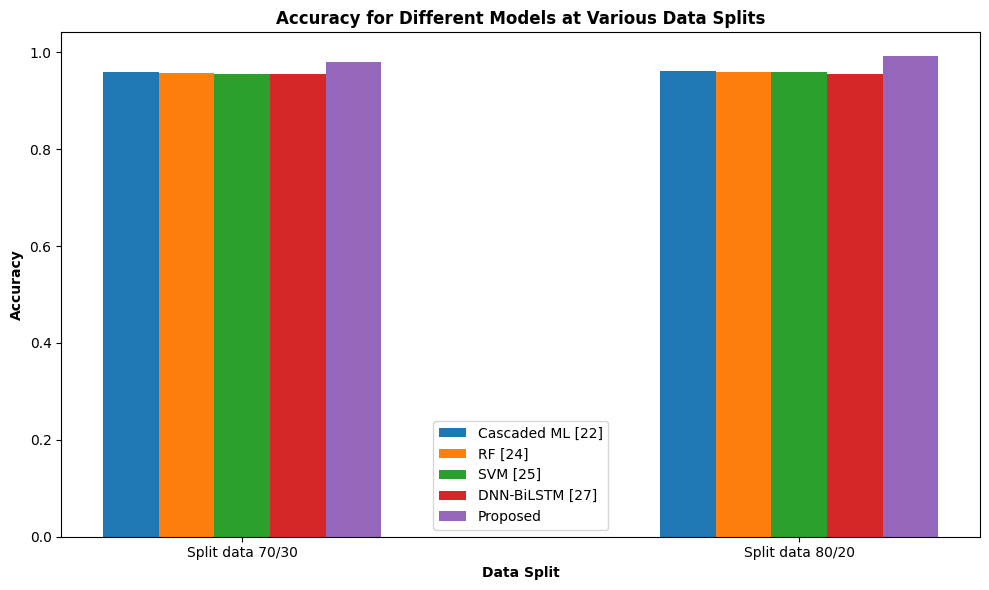

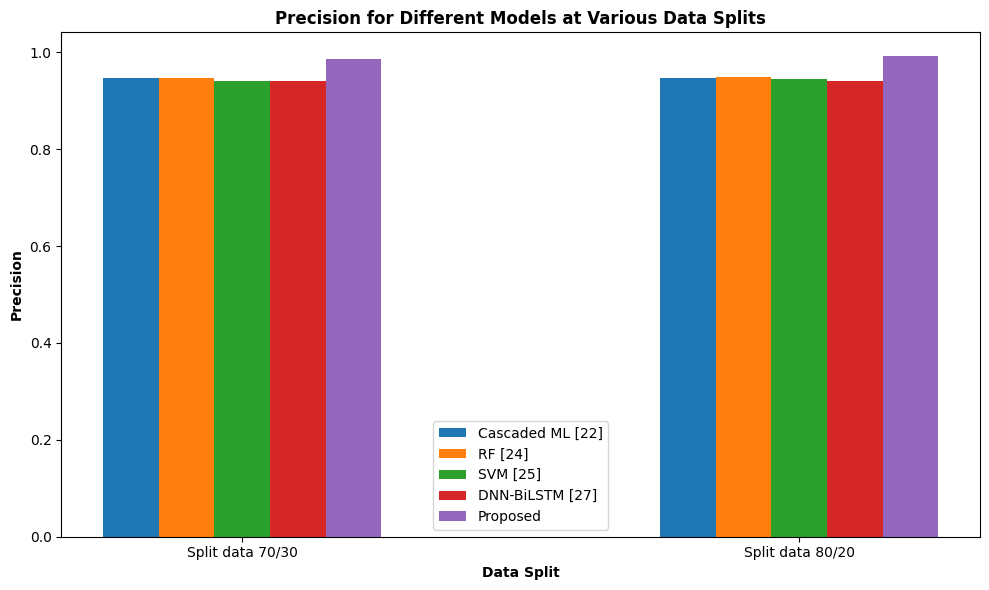

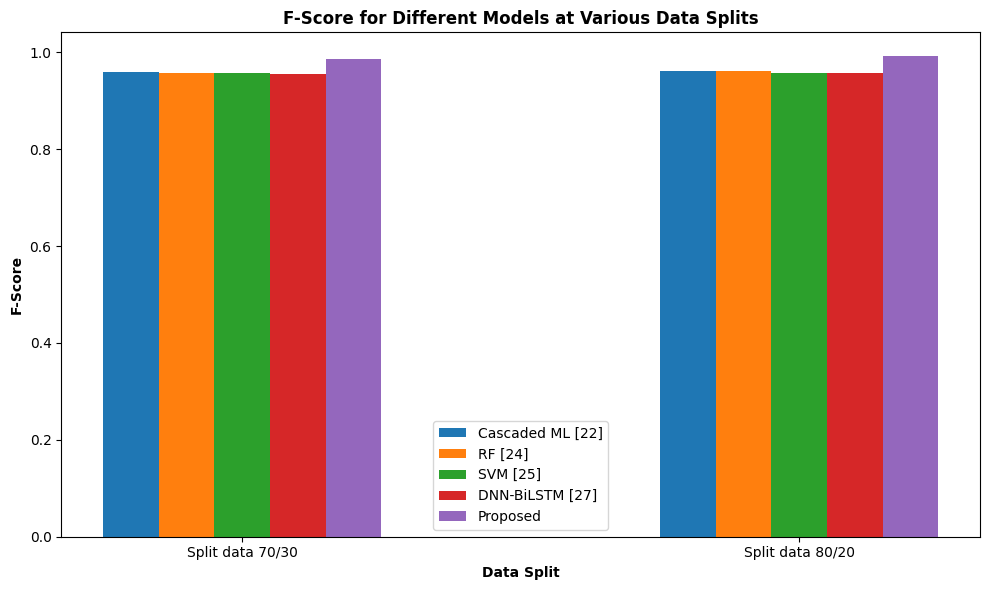

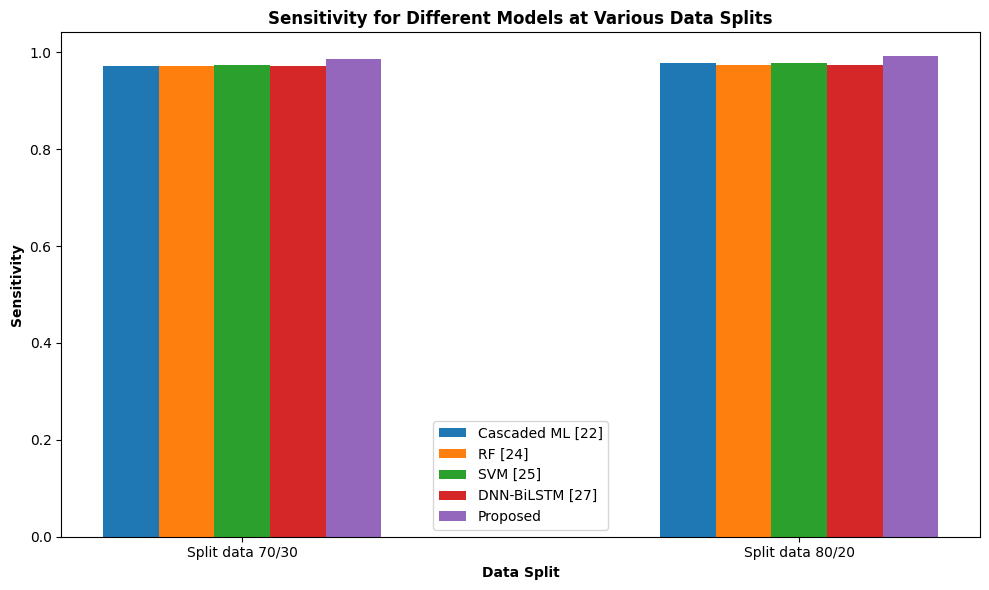

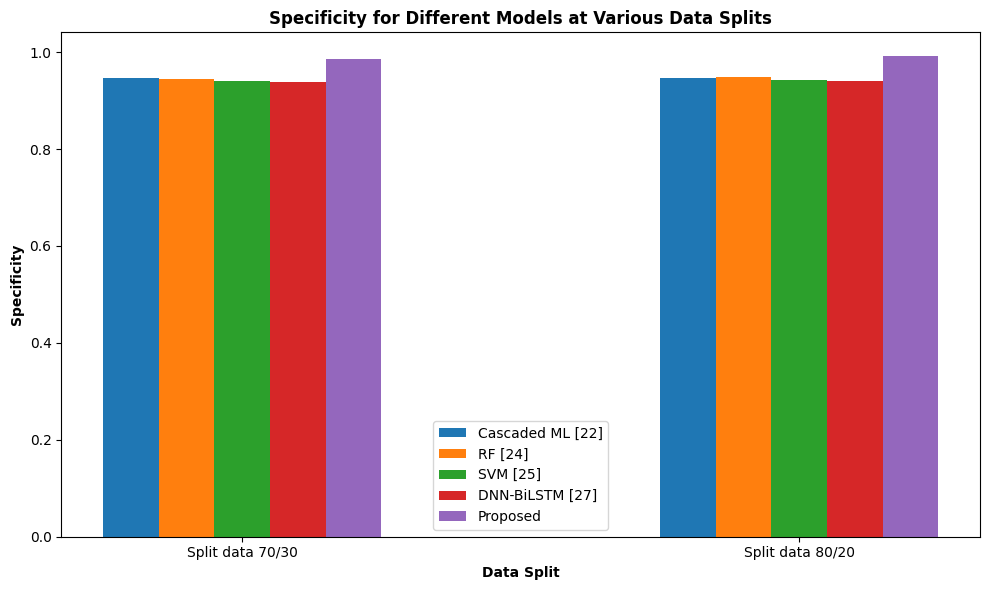

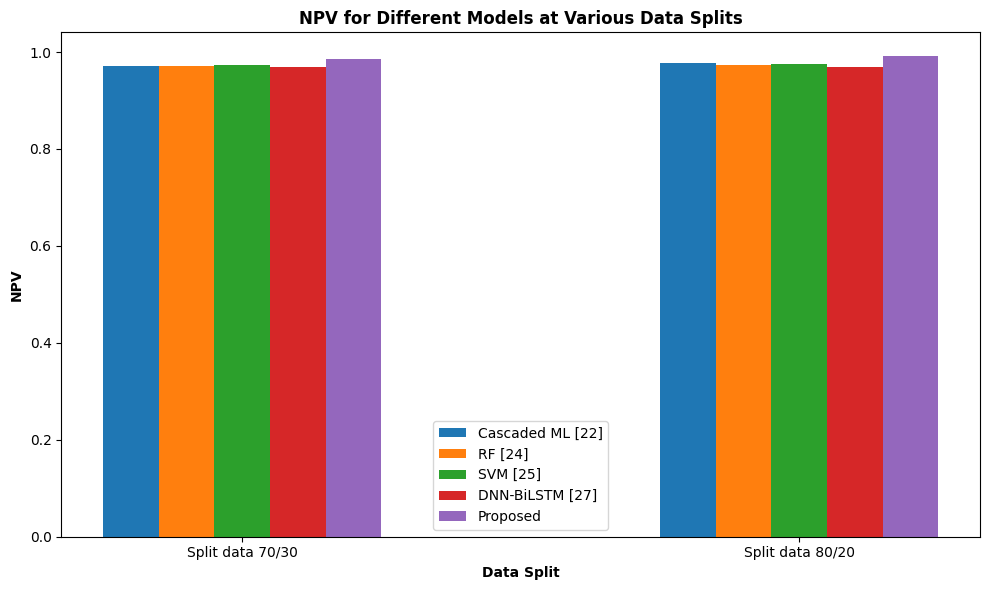

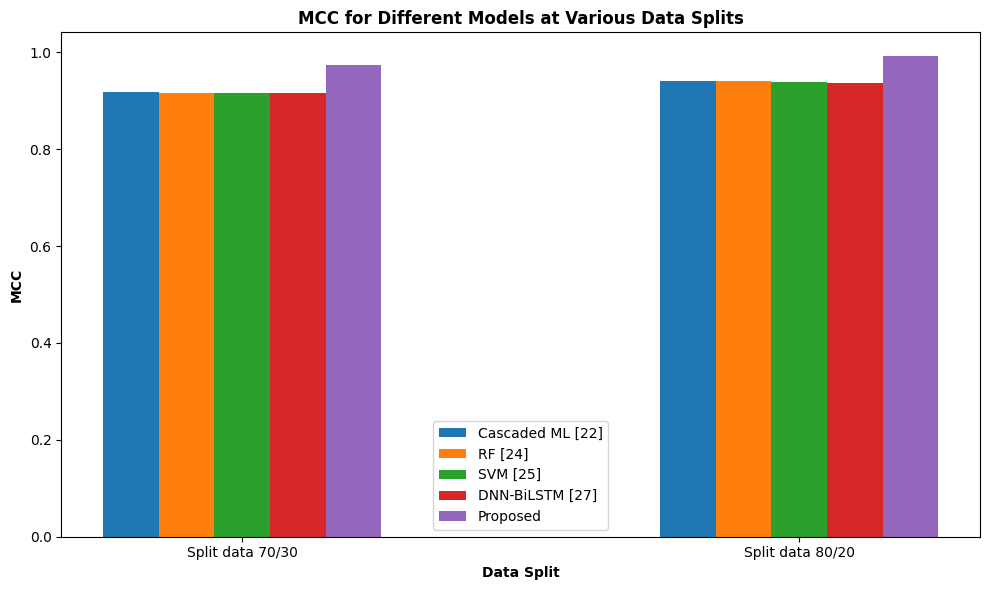

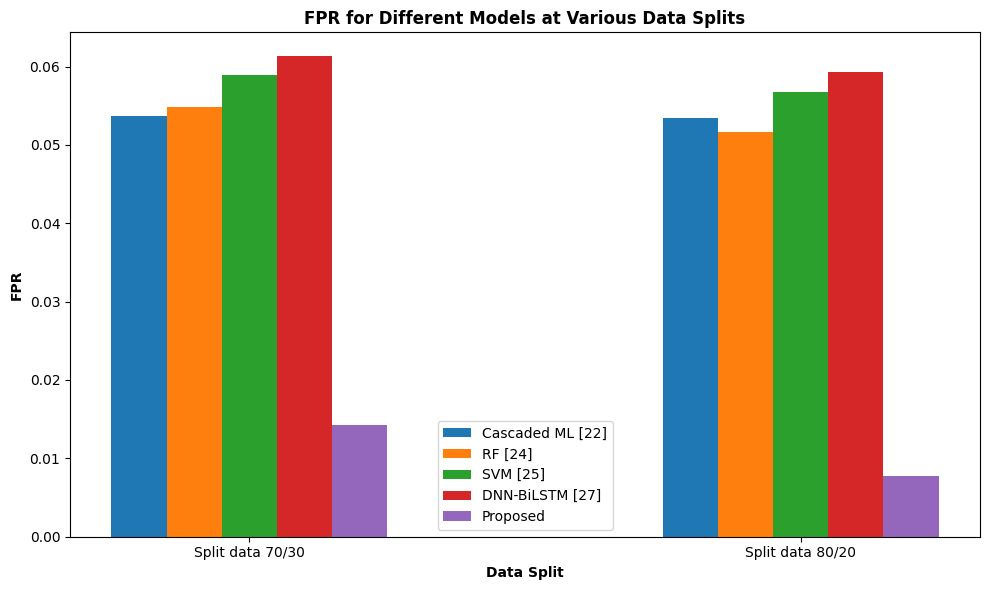

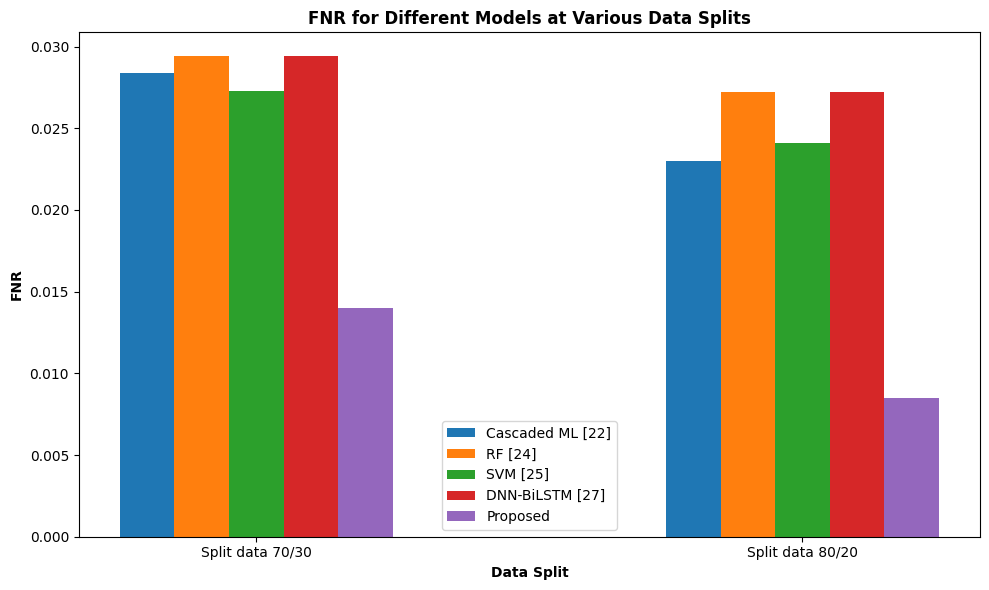

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Set width of bar
barWidth = 0.10

# Dataset split labels
splits = ['Split data 70/30', 'Split data 80/20']

# Metrics values extracted from the provided comparative analysis
metrics = {
    'Accuracy': {
        'Cascaded ML [22]': [0.9589, 0.9615],
        'RF [24]': [0.9578, 0.9603],
        'SVM [25]': [0.9557, 0.9589],
        'DNN-BiLSTM [27]': [0.9544, 0.9557],
        'Proposed': [0.9804, 0.9918]
    },
    'Precision': {
        'Cascaded ML [22]': [0.9469, 0.9473],
        'RF [24]': [0.9458, 0.9493],
        'SVM [25]': [0.9408, 0.9443],
        'DNN-BiLSTM [27]': [0.9398, 0.9411],
        'Proposed': [0.9870, 0.9915]
    },
    'F-Score': {
        'Cascaded ML [22]': [0.9591, 0.9612],
        'RF [24]': [0.9580, 0.9617],
        'SVM [25]': [0.9573, 0.9573],
        'DNN-BiLSTM [27]': [0.9543, 0.9574],
        'Proposed': [0.9870, 0.9915]
    },
    'Sensitivity': {
        'Cascaded ML [22]': [0.9716, 0.9771],
        'RF [24]': [0.9706, 0.9733],
        'SVM [25]': [0.9734, 0.9779],
        'DNN-BiLSTM [27]': [0.9707, 0.9728],
        'Proposed': [0.9870, 0.9915]
    },
    'Specificity': {
        'Cascaded ML [22]': [0.9463, 0.9473],
        'RF [24]': [0.9452, 0.9484],
        'SVM [25]': [0.9412, 0.9432],
        'DNN-BiLSTM [27]': [0.9394, 0.9412],
        'Proposed': [0.9857, 0.9913]
    },
    'NPV': {
        'Cascaded ML [22]': [0.9713, 0.9771],
        'RF [24]': [0.9702, 0.9724],
        'SVM [25]': [0.9723, 0.9759],
        'DNN-BiLSTM [27]': [0.9700, 0.9701],
        'Proposed': [0.9857, 0.9911]
    },
    'MCC': {
        'Cascaded ML [22]': [0.9181, 0.9408],
        'RF [24]': [0.9159, 0.9417],
        'SVM [25]': [0.9164, 0.9396],
        'DNN-BiLSTM [27]': [0.9161, 0.9374],
        'Proposed': [0.9747, 0.9917]
    },
    'FPR': {
        'Cascaded ML [22]': [0.0537, 0.0534],
        'RF [24]': [0.0548, 0.0516],
        'SVM [25]': [0.0589, 0.0567],
        'DNN-BiLSTM [27]': [0.0613, 0.0593],
        'Proposed': [0.0143, 0.0077]
    },
    'FNR': {
        'Cascaded ML [22]': [0.0284, 0.0230],
        'RF [24]': [0.0294, 0.0272],
        'SVM [25]': [0.0273, 0.0241],
        'DNN-BiLSTM [27]': [0.0294, 0.0272],
        'Proposed': [0.0140, 0.0085]
    }
}

# Plot each metric
for metric_name, model_data in metrics.items():
    plt.figure(figsize=(10, 6))
    x = np.arange(len(splits))
    for i, (model, values) in enumerate(model_data.items()):
        plt.bar(x + i * barWidth, values, width=barWidth, label=model)

    plt.xlabel('Data Split', fontweight='bold')
    plt.ylabel(metric_name, fontweight='bold')
    plt.xticks(x + (len(model_data) / 2 - 0.5) * barWidth, splits)
    plt.title(f'{metric_name} for Different Models at Various Data Splits', fontweight='bold')
    plt.legend()
    plt.tight_layout()
    plt.show()



# **Mitigation**

# **Blockchain-Based Reporting and Logging**

# **reinforcement learning-based intrusion prevention system (IPS)**

In [5]:
import numpy as np
import pandas as pd
import random
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

# -----------------------------------
# Human-readable Action Mapping
# -----------------------------------
ACTION_MAP = {
    0: "Do Nothing",
    1: "Block IP Address",
    2: "Notify System",
    3: "Attack Removed"
}

# -----------------------------------
# Simplified Blockchain Module
# -----------------------------------
class Blockchain:
    def __init__(self):
        self.ledger = []

    def consensus(self, report):
        # Simulated PBFT/PoS consensus mechanism
        num_nodes = 10
        votes = [random.choice([0, 1]) for _ in range(num_nodes)]
        agreement = sum(votes)
        if agreement > num_nodes // 2:
            self.ledger.append(report)
            return True
        return False

    def log(self, report):
        success = self.consensus(report)
        if success:
            print(f"✅ Attack report logged on blockchain: {report}")
        else:
            print("❌ Report failed to reach consensus")

    def get_ledger(self):
        return self.ledger

# -----------------------------------
# VANET Environment with CSV Input
# -----------------------------------
class VANETEnvCSV:
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        self.index = 0
        self.total_steps = len(self.data)
        self.action_space = 4
        self.state_column = self._find_state_column()

    def _find_state_column(self):
        print("🔍 Columns in your CSV:", self.data.columns.tolist())
        numeric_cols = self.data.select_dtypes(include=[np.number]).columns
        if 'node_id' in self.data.columns:
            return 'node_id'
        elif len(numeric_cols) > 0:
            print(f"⚠️ Using '{numeric_cols[0]}' as fallback state column.")
            return numeric_cols[0]
        else:
            raise ValueError("No valid numeric column found for state.")

    def reset(self):
        self.index = 0
        return [self.data.iloc[self.index][self.state_column]]

    def step(self, action):
        row = self.data.iloc[self.index]

        throughput = row.get('throughput', 0.5)
        delay = row.get('delay', 1.0)
        efficiency = row.get('efficiency', 0.5)

        w1, w2, w3 = 0.4, 0.3, 0.3
        reward = w1 * throughput - w2 * delay + w3 * efficiency

        self.index += 1
        done = self.index >= self.total_steps

        if not done:
            next_state = [self.data.iloc[self.index][self.state_column]]
        else:
            next_state = [0]

        return next_state, reward, done

# -----------------------------------
# Q-Network Definition
# -----------------------------------
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.out = nn.Linear(64, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.out(x)

# -----------------------------------
# DQN Agent
# -----------------------------------
class DQNAgent:
    def __init__(self, state_size, action_size, gamma=0.99, alpha=0.001, epsilon=1.0):
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.1
        self.learning_rate = alpha

        self.model = QNetwork(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.criterion = nn.MSELoss()
        self.memory = deque(maxlen=2000)

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            q_values = self.model(state_tensor)
        return torch.argmax(q_values).item()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size:
            return

        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            next_state_tensor = torch.FloatTensor(next_state).unsqueeze(0)
            target = reward
            if not done:
                target += self.gamma * torch.max(self.model(next_state_tensor)).item()

            target_f = self.model(state_tensor).clone().detach()
            target_f[0][action] = target

            output = self.model(state_tensor)
            loss = self.criterion(output, target_f)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# -----------------------------------
# Training Loop with Blockchain Integration
# -----------------------------------
def train_dqn_from_csv(csv_file, episodes=10):
    env = VANETEnvCSV(csv_file)
    agent = DQNAgent(state_size=1, action_size=env.action_space)
    blockchain = Blockchain()
    episode_log = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0

        for step in range(env.total_steps):
            action = agent.act(state)
            action_desc = ACTION_MAP[action]
            next_state, reward, done = env.step(action)

            # Simulate attack detection logging
            if action in [1, 2, 3]:  # If mitigation is taken
                report = {
                    "episode": episode + 1,
                    "step": step,
                    "state": state[0],
                    "action": action_desc,
                    "reward": reward
                }
                blockchain.log(report)

            agent.remember(state, action, reward, next_state, done)
            agent.replay()

            episode_log.append({
                "episode": episode + 1,
                "step": step,
                "state": state[0],
                "action": action,
                "action_desc": action_desc,
                "reward": reward
            })

            state = next_state
            total_reward += reward

            if done:
                break

        print(f"Episode {episode+1}/{episodes} | Total Reward: {total_reward:.2f} | Epsilon: {agent.epsilon:.2f}")

    df = pd.DataFrame(episode_log)
    df.to_csv("mitigation_actions_log.csv", index=False)
    print("\n✅ Mitigation action log saved as 'mitigation_actions_log.csv'")
    print("\n🧾 Blockchain Ledger:\n", pd.DataFrame(blockchain.get_ledger()))

# -----------------------------------
# Run Training
# -----------------------------------
if __name__ == "__main__":
    train_dqn_from_csv("/content/drive/MyDrive/Colab Notebooks/archive (90)/selected_features_output.csv", episodes=100)


🔍 Columns in your CSV: ['std_packet_length', 'mean_packet_length', 'mean_packet_length.1', 'std_packet_length.1', 'mean_packet_length.2', 'std_packet_length.2', 'std_packet_length.3', 'mean_packet_length.3', 'std_packet_length.4', 'std_packet_length.5', 'std_packet_length.6', 'std_packet_length.7', 'mean_packet_length.4', 'std_packet_length.8', 'mean_packet_length.5', 'std_packet_length.9', 'std_packet_length.10', 'std_packet_length.11', 'mean_packet_length.6', 'std_packet_length.12', 'std_packet_length.13', 'mean_packet_length.7', 'mean_packet_length.8', 'std_packet_length.14', 'std_packet_length.15', 'mean_packet_length.9', 'std_packet_length.16', 'mean_packet_length.10', 'std_packet_length.17', 'std_packet_length.18', 'std_packet_length.19', 'mean_packet_length.11', 'mean_packet_length.12', 'std_packet_length.20', 'std_packet_length.21', 'std_packet_length.22', 'std_packet_length.23', 'std_packet_length.24', 'std_packet_length.25', 'std_packet_length.26', 'mean_packet_length.13', 's